In [30]:
!pip install catboost

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [32]:
df_file_path = pd.read_csv('/content/stud.csv')
df = df_file_path
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
training_data = df.drop(columns = ['math_score'], axis = 1)
target_data = df['math_score']

In [34]:
training_data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [35]:
target_data

,math_score
0,72
1,69
2,90
3,47
4,76
...,...
995,88
996,62
997,59
998,68


In [36]:
# Categorical Features which contains the uniqure values

print("The unique values int in the gender feature:-", df['gender'].unique())
print("The unique values int in the race_ethnicity feature:-", df['race_ethnicity'].unique())
print("The unique values int in the parental_level_of_education feature:-", df['parental_level_of_education'].unique())
print("The unique values int in the lunch feature:-", df['lunch'].unique())
print("The unique values int in the test_preparation_course feature:-", df['test_preparation_course'].unique())

The unique values int in the gender feature:- ['female' 'male']
The unique values int in the race_ethnicity feature:- ['group B' 'group C' 'group A' 'group D' 'group E']
The unique values int in the parental_level_of_education feature:- ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The unique values int in the lunch feature:- ['standard' 'free/reduced']
The unique values int in the test_preparation_course feature:- ['none' 'completed']


In [37]:
# Create Column Transformer with 3 types of transformers

num_features = training_data.select_dtypes(exclude = 'object').columns
cat_features = training_data.select_dtypes(include='object').columns

In [38]:
num_features

Index(['reading_score', 'writing_score'], dtype='object')

In [39]:
cat_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [40]:
# Implementation of 'OneHotEncode' Method

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

categorical_transformer = OneHotEncoder()
numeric_transformer = StandardScaler()

preprocessing = ColumnTransformer(
    [
        ('OneHotEncoder', categorical_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [41]:
training_data = preprocessing.fit_transform(training_data)

In [42]:
print("the trainig data set has encoded with label encoder and onehot encoding"), training_data

the trainig data set has encoded with label encoder and onehot encoding


(None,
 array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
          0.19399858,  0.39149181],
        [ 1.        ,  0.        ,  0.        , ...,  0.        ,
          1.42747598,  1.31326868],
        [ 1.        ,  0.        ,  0.        , ...,  1.        ,
          1.77010859,  1.64247471],
        ...,
        [ 1.        ,  0.        ,  0.        , ...,  0.        ,
          0.12547206, -0.20107904],
        [ 1.        ,  0.        ,  0.        , ...,  0.        ,
          0.60515772,  0.58901542],
        [ 1.        ,  0.        ,  0.        , ...,  1.        ,
          1.15336989,  1.18158627]]))

In [43]:
training_data.shape

(1000, 19)

# train and test of the model

In [44]:
X_train, X_test, y_train, y_test = train_test_split(training_data, target_data, test_size=0.2, random_state = 42 )
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 19), (800,), (200, 19), (200,))

# Create an Evaluate Function to give all metrics after model Training


In [45]:
def model_evaluate(true, predicted):
  mae = mean_absolute_error(true, predicted)
  mse = mean_squared_error(true, predicted)
  rmse = np.sqrt(mse)
  r2_squre = r2_score(true, predicted)
  return mae, mse, r2_squre

In [50]:
models ={

    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
  model = list(models.values()) [i]
  model.fit(X_train, y_train)

  # Make Predictions

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # Evaluation of the models

  model_train_mae, model_train_rmse, model_train_r2_square = model_evaluate(y_train, y_train_pred)
  model_test_mae, model_test_rmse, model_test_r2_square = model_evaluate(y_test, y_test_pred)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])

  print('Model performance for Training set')
  print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
  print("- R2 Score: {:.4f}".format(model_train_r2_square))

  print('----------------------------------')

  print('Model performance for Test set')
  print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
  print("- R2 Score: {:.4f}".format(model_test_r2_square))
  r2_list.append(model_test_r2_square)

  print('='*35)
  print('\n')



Linear Regression
Model performance for Training set
- Root Mean Squared Error: 28.3349
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 29.0952
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 43.4784
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 42.5064
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 28.3378
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 29.0563
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 32.5070
- Mean Absolute Error: 4.5070
- R2 Score: 0.8558
----------------

# Result :

In [51]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.849910
8,AdaBoost Regressor,0.846740
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.782192
4,Decision Tree,0.752320


# Linear Regression :

In [52]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


# Plot y_pred and y_test

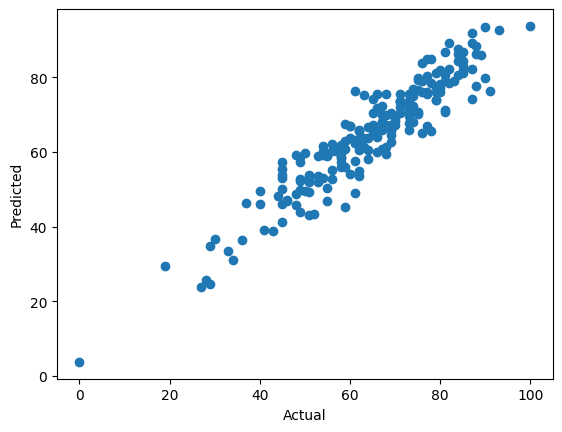

In [57]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

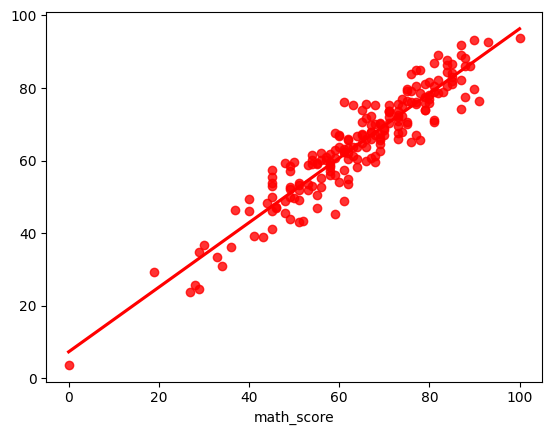

In [60]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

# Difference between Actual and Predicted Values

In [61]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
